### Crime Pattern Prediction

In [30]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from  sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plot
from sklearn import linear_model
from IPython.display import Image 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
import sklearn.preprocessing as prep
import pydotplus 
import math
from sklearn.linear_model import RidgeCV
import sklearn.linear_model as linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
communities_crime_df = pd.read_csv(r"C:\Users\ABNI\Documents\GitHub\crime-prediction\communities-crime-clean.csv.csv")

# Sanity test we have good data
communities_crime_df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,...,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,...,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,...,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,...,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,...,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15


#### 1. Decision Tree

In [3]:
def setHighCrime(df):
    '''Function to set value of highCrime depending on ViolentCrimesPerPop'''
    if df['ViolentCrimesPerPop'] > 0.1:
        return True
    else:
        return False
    
# Adding a new field "highCrime"
communities_crime_df['highCrime'] = communities_crime_df.apply(setHighCrime, axis=1)

# Calculating the percentage of positive and negative instances in the dataset
percentage_intances = communities_crime_df.groupby('highCrime').size() * 100 / len(communities_crime_df)
print(percentage_intances)
print("------------------")
print("Percentage Positive Instance = {}\nPercentage Negative Instance = {} ".format(percentage_intances[1],percentage_intances[0]))

highCrime
False    37.280482
True     62.719518
dtype: float64
------------------
Percentage Positive Instance = 62.719518314099346
Percentage Negative Instance = 37.280481685900654 


In [4]:
#Dropping non-predictive fields as well as ViolentCrimesPerPop field 
X = communities_crime_df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).drop('highCrime', axis=1)
features = list(X.columns)
y = communities_crime_df["highCrime"]


# First, we tried by not defining the max depth
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)
predicted = dt_clf.predict(X[features])
recall_score = metrics.recall_score(communities_crime_df['highCrime'], predicted)
precision_score = metrics.precision_score(communities_crime_df['highCrime'], predicted)
accuracy_score = metrics.accuracy_score(communities_crime_df['highCrime'], predicted)
print("Training Accuracy = {} Precision = {} Recall = {}".format(accuracy_score,precision_score,recall_score))

Training Accuracy = 1.0 Precision = 1.0 Recall = 1.0


In [5]:
for depth in range(1,10):
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    if tree_clf.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_clf, X, y,scoring='accuracy', cv=10, n_jobs=1))
    print("Depth: %i Accuracy: %.3f" % (depth,score))

Depth: 1 Accuracy: 0.761
Depth: 2 Accuracy: 0.776
Depth: 3 Accuracy: 0.798
Depth: 4 Accuracy: 0.790
Depth: 5 Accuracy: 0.779
Depth: 6 Accuracy: 0.768
Depth: 7 Accuracy: 0.764
Depth: 8 Accuracy: 0.746
Depth: 9 Accuracy: 0.744


In [6]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X,y)
#Predicting 
pred_dt= dt_clf.predict(X)
dt_accuracy= metrics.accuracy_score(communities_crime_df['highCrime'], pred_dt)
dt_precision= metrics.precision_score(communities_crime_df['highCrime'], pred_dt)
dt_recall= metrics.recall_score(communities_crime_df['highCrime'], pred_dt)
print("Accuracy for DT =",dt_accuracy)
print("Precision for DT =",dt_precision)
print("Recall for DT =",dt_precision)

Accuracy for DT = 0.8359257400903161
Precision for DT = 0.9002601908065915
Recall for DT = 0.9002601908065915


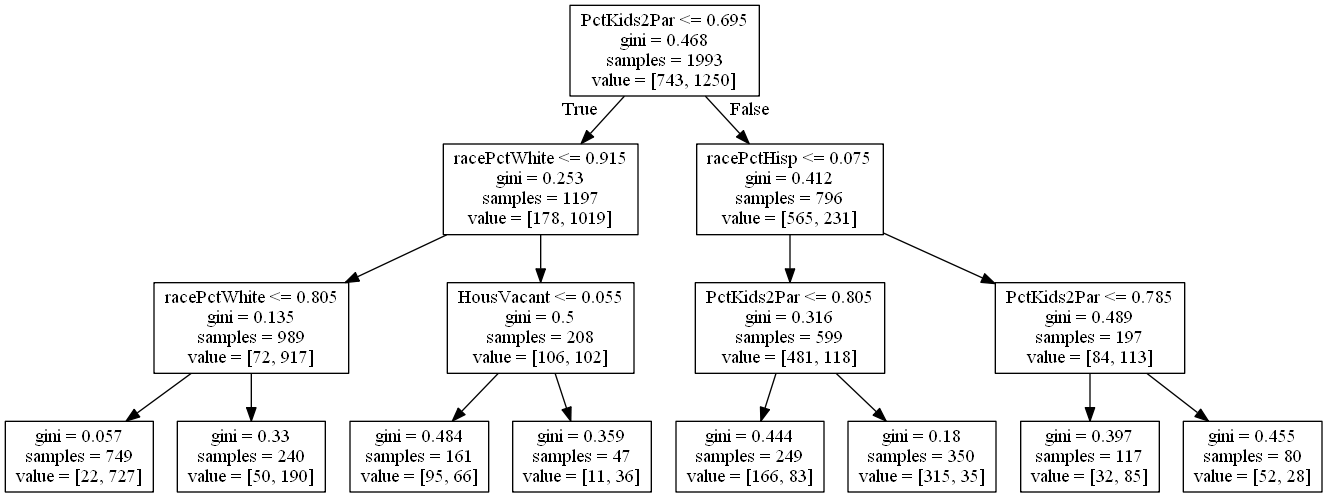

In [7]:
dot_data = tree.export_graphviz(dt_clf, out_file=None,feature_names=list(X))

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [8]:
# We can check the main features used for classification by checking the feature importance, the higher the value,
# more important the feature would be.
# We can sort the importance scores in descending order and take the top most.
importances=dt_clf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
# We have taken the top 5 feature 
print("The main features used for classification")
print(X.columns[indices[:5]])
print("Top main feature is",X.columns[indices[:1]][0])

Feature ranking:
The main features used for classification
Index(['PctKids2Par', 'racePctWhite', 'racePctHisp', 'HousVacant',
       'LemasPctOfficDrugUn'],
      dtype='object')
Top main feature is PctKids2Par


In [9]:
# Applying 10 fold cross validation
dt_cv_accuracy = cross_val_score(dt_clf, X, y, cv=10).mean()
dt_cv_precision= cross_val_score(dt_clf, X, y, cv=10, scoring='precision').mean()
dt_cv_recall = cross_val_score(dt_clf, X, y, cv=10, scoring='recall').mean()
print("Cross Validation Accuracy DT:", dt_cv_accuracy)
print("Cross Validation Recall DT:", dt_cv_precision)
print("Cross Validation Precision DT:", dt_cv_recall)

Cross Validation Accuracy DT: 0.7982437185929648
Cross Validation Recall DT: 0.8432674799594686
Cross Validation Precision DT: 0.8392


#### 2. Linear Classification

In [10]:
# Using GaussianNB
gaussian_clf = GaussianNB()
gaussian_clf.fit(X, y)

# Applying 10 fold cross validation
gaussian_accuracy = cross_val_score(gaussian_clf, X, y, cv=10).mean()
gaussian_precision= cross_val_score(gaussian_clf, X, y, cv=10, scoring='precision').mean()
gaussian_recall = cross_val_score(gaussian_clf, X, y, cv=10, scoring='recall').mean()
print("Accuracy for gaussian :", gaussian_accuracy)
print("Recall for gaussian:", gaussian_recall)
print("Precision for gaussian:", gaussian_precision)

Accuracy for gaussian : 0.761608040201005
Recall for gaussian: 0.692
Precision for gaussian: 0.9117998148278733


In [11]:
df_predictiveFeature = communities_crime_df.drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1)

dictPredFeature = {}
# Collecting data for the two classes
true_df = X[df_predictiveFeature['highCrime'] == 1]
false_df = X[df_predictiveFeature['highCrime'] == 0]
for column in X:
    mean_true = true_df[column].mean()
    mean_false = false_df[column].mean()
    var_true = true_df[column].var()
    var_false = false_df[column].var()
    if(column != 'highCrime'):
        predScore = abs((mean_true - mean_false))/(math.sqrt(var_true)+math.sqrt(var_false))
        dictPredFeature[column] = predScore
most_pred_features = sorted(dictPredFeature.items(), key=lambda x: x[1])[-10:]
for i in most_pred_features:
    print(i)

('MalePctDivorce', 0.6165342437579264)
('PctTeen2Par', 0.6426208020335665)
('pctWInvInc', 0.6607203219208594)
('PctYoungKids2Par', 0.6646705535981033)
('TotalPctDiv', 0.6742823162675443)
('FemalePctDiv', 0.6936040623575482)
('PctIlleg', 0.7089291060645266)
('racePctWhite', 0.7348840522379364)
('PctFam2Par', 0.74516152011997)
('PctKids2Par', 0.8093364216318364)


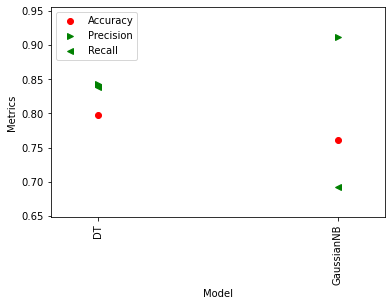

In [12]:
labels = ["DT" ,"GaussianNB"]
acc_list = [dt_cv_accuracy,gaussian_accuracy]
pre_list = [dt_cv_precision,gaussian_precision]
re_list = [dt_cv_recall,gaussian_recall]

x_axis_range = range(2)
plt.xticks(x_axis_range, labels, rotation='vertical')
# plt.legend()

plt.plot(x_axis_range,acc_list,'ro',color="Red",label="Accuracy")
plt.plot(x_axis_range,pre_list,'>',color="green",label="Precision")
plt.plot(x_axis_range,re_list,'<',color="green",label="Recall")

plt.xlabel('Model')
plt.ylabel('Metrics')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
legend = plt.legend()
plt.show()

In [13]:
linearsvmclf = svm.SVC(kernel='linear', C =1.0)
accuracy_svm = cross_val_score(linearsvmclf, X, y, cv=10, scoring='accuracy').mean()
precision_svm = cross_val_score(linearsvmclf, X, y, cv=10, scoring='precision').mean()
recall_svm = cross_val_score(linearsvmclf, X, y, cv=10, scoring='recall').mean()
print ('Accuracy for LinearSVC is', accuracy_svm)
print ('Precision for LinearSVC is', precision_svm)
print ('Recall for LinearSVC is', recall_svm)

Accuracy for LinearSVC is 0.8047537688442212
Precision for LinearSVC is 0.8551793727894672
Recall for LinearSVC is 0.8375999999999999


In [14]:
linearsvmclf.fit(X,y)

linearsvmclf_coef_array = {}
count = 0
for i in X.columns:
    linearsvmclf_coef_array[i] = abs(linearsvmclf.coef_[0][count])
    count = count+ 1

most_predictive_features = sorted(linearsvmclf_coef_array.items(), key=lambda x: x[1])[-10:]
most_predictive_features

[('agePct12t21', 0.9844298794100456),
 ('RentHighQ', 0.9916382536111196),
 ('PersPerOccupHous', 1.027554397352899),
 ('MalePctDivorce', 1.073578841827074),
 ('population', 1.1086454264275147),
 ('PctFam2Par', 1.5426528869036265),
 ('racepctblack', 1.7203177655788284),
 ('PctKids2Par', 2.0576723456134776),
 ('racePctWhite', 2.2351581784693813),
 ('pctWInvInc', 2.3861552101921903)]

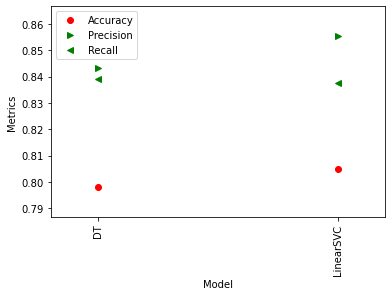

In [15]:
labels = ["DT" ,"LinearSVC"]
acc_list = [dt_cv_accuracy,accuracy_svm]
pre_list = [dt_cv_precision,precision_svm]
re_list = [dt_cv_recall,recall_svm]

x_axis_range = range(2)
plt.xticks(x_axis_range, labels, rotation='vertical')
# plt.legend()

plt.plot(x_axis_range,acc_list,'ro',color="Red",label="Accuracy")
plt.plot(x_axis_range,pre_list,'>',color="green",label="Precision")
plt.plot(x_axis_range,re_list,'<',color="green",label="Recall")

plt.xlabel('Model')
plt.ylabel('Metrics')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
legend = plt.legend()
plt.show()

#### 3. Regression

In [16]:
Y = communities_crime_df['ViolentCrimesPerPop']
linear_regression = LinearRegression()
#df = df.drop('highCrime', 1)
mean_sq_err= cross_val_score(linear_regression,X, Y,scoring='neg_mean_squared_error',cv=10)
print("Estimated meansquared- error (MSE) of the model is",np.abs(mean_sq_err.mean()))

Estimated meansquared- error (MSE) of the model is 0.02009396930444534


In [17]:
linear_regression.fit(X,Y)
print("MSE on the training set is {}".format(np.mean((linear_regression.predict(X) - Y) ** 2)))

MSE on the training set is 0.016516774880307186


In [18]:
# Taking the coefficients in an array
list_coef = np.array(linear_regression)


print("Most Predictive Feature of a High Crime Rate is", X.columns[np.argmax(list_coef)])
print("Most Predictive Feature of a Low Crime Rate is", X.columns[np.argmin(list_coef)])

Most Predictive Feature of a High Crime Rate is population
Most Predictive Feature of a Low Crime Rate is population


In [19]:
clf = RidgeCV(alphas=(10, 1, 0.1, 0.01, 0.001))
clf.fit(X, Y)
print("Best alpha", clf.alpha_)  

#Other way to find out best aplha 
#alphas = np.array([10, 1, 0.1, 0.01, 0.001])
#model = Ridge()
#grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
#grid.fit(X, Y)
#print(grid.best_estimator_.alpha)

Best alpha 1.0


In [20]:
ridge_clf = linear_model.Ridge(alpha=1.0)
ridge_clf.fit(X,Y)
mean_sq_err= cross_val_score(ridge_clf,X, Y,scoring='neg_mean_squared_error',cv=10)
print("Estimated meansquared- error (MSE) of the model is",np.abs(mean_sq_err.mean()))

Estimated meansquared- error (MSE) of the model is 0.019795021348172296


In [21]:
print("MSE on the training set is {0:0.2f}".format(np.mean((ridge_clf.predict(X) - Y) ** 2)))

#ridge_reg=linear_model.Ridge(alpha = 0.001)
#ridge_reg.fit(X,Y)

#print("Mean squared error: %.2f"
#      % np.mean((ridge_reg.predict(X) - Y) ** 2))
#print("MSE on the training set is {}".format(np.mean((ridge_reg.predict(X) - Y) ** 2)))

MSE on the training set is 0.02


In [22]:
poly_feature = PolynomialFeatures(degree  = 2, interaction_only = False)
poly_df = poly_feature.fit_transform(X)
ridge_clf.fit(poly_df,y)
## caluclating MSE
poly_mse= cross_val_score(linear_regression, poly_df, Y,scoring='neg_mean_squared_error',cv=10)
print("Estimated MSE of the model under 10-fold CV is",np.abs(poly_mse.mean()))

Estimated MSE of the model under 10-fold CV is 0.12990229461154573


In [23]:
print("Mean squared error: %.2f" % np.mean((ridge_clf.predict(poly_df) - Y) ** 2))

Mean squared error: 0.23


#### 4. Non-linear Kernel for SVM

In [24]:
# Applying polynomial Kernel SVC
poly_clf = svm.SVC(kernel='poly', degree=2, C= 50)
X_d = X
y_d = y
# For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.
# clean dataset 
poly_accuracy_d = cross_val_score(poly_clf, X_d, y_d, cv=10, scoring='accuracy').mean()
poly_precision_d = cross_val_score(poly_clf, X_d, y_d, cv=10, scoring='precision').mean()
poly_recall_d = cross_val_score(poly_clf, X_d, y_d, cv=10, scoring='recall').mean()

print ('Accuracy for polynomial(Clean Data) is', poly_accuracy_d)
print ('Precision for polynomial(Clean Data) is', poly_precision_d)
print ('Recall for polynomial(Clean Data) is', poly_recall_d)

Accuracy for polynomial(Clean Data) is 0.7385527638190956
Precision for polynomial(Clean Data) is 0.7980639402193053
Recall for polynomial(Clean Data) is 0.7935999999999999


In [25]:
# clean dataset
X = communities_crime_df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).drop('highCrime', axis=1)
features = list(X.columns)
y = communities_crime_df["highCrime"]

poly_accuracy = cross_val_score(poly_clf, X, y, cv=10, scoring='accuracy').mean()
poly_precision = cross_val_score(poly_clf, X, y, cv=10, scoring='precision').mean()
poly_recall = cross_val_score(poly_clf, X, y, cv=10, scoring='recall').mean()

print ('Accuracy for polynomial(Clean Data) is', poly_accuracy)
print ('Precision for polynomial(Clean Data) is', poly_precision)
print ('Recall for polynomial(Clean Data) is', poly_recall)

Accuracy for polynomial(Clean Data) is 0.7385527638190956
Precision for polynomial(Clean Data) is 0.7980639402193053
Recall for polynomial(Clean Data) is 0.7935999999999999


In [26]:
#clf = KMeans(n_clusters = 2)
km_clf = KMeans(n_clusters = 2)
km_accuracy = cross_val_score(km_clf, X, y, cv=10, scoring='accuracy').mean()
km_precision = cross_val_score(km_clf, X, y, cv=10, scoring='precision').mean()
km_recall = cross_val_score(km_clf, X, y, cv=10, scoring='recall').mean()

print ('Accuracy is for KMeans(Clean data)', km_accuracy)
print ('Precision is for KMeans(Clean data)', km_precision)
print ('Recall is for KMeans(Clean data)', km_recall)

Accuracy is for KMeans(Clean data) 0.5220653266331658
Precision is for KMeans(Clean data) 0.6250689249591745
Recall is for KMeans(Clean data) 0.4210620051686306


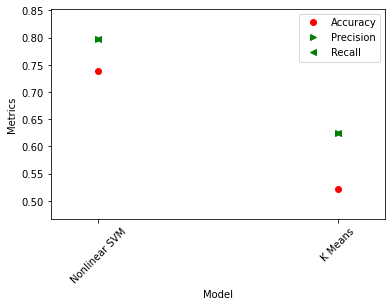

In [27]:
names = ["Nonlinear SVM" ,"K Means"]
acc_list = [poly_accuracy,km_accuracy]
pre_list = [poly_precision,km_precision]
re_list = [poly_recall,km_recall]
xaxisRange = range(2)
plt.xticks(xaxisRange, names, rotation=45)
# plt.legend()

plt.plot(xaxisRange,acc_list,'ro',color="Red",label="Accuracy")
plt.plot(xaxisRange,pre_list,'>',color="green",label="Precision")
plt.plot(xaxisRange,pre_list,'<',color="green",label="Recall")

plt.xlabel('Model')
plt.ylabel('Metrics')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
legend = plt.legend()
plt.show()

#### 5. GradientBoostingClassifier

In [28]:
clf = GradientBoostingClassifier()
clf.fit(X_d, y_d)
acc_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean()
pre_scores = cross_val_score(clf, X, y, cv=10, scoring='precision').mean()
rec_scores = cross_val_score(clf, X, y, cv=10, scoring='recall').mean()
print ('Accuracy GradientBoostingClassifier(Clean Data) is', acc_scores)
print ('Precision GradientBoostingClassifier(Clean Data)is', pre_scores)
print ('Recall is GradientBoostingClassifier(Clean Data) is ', rec_scores)

Accuracy GradientBoostingClassifier(Clean Data) is 0.79871608040201
Precision GradientBoostingClassifier(Clean Data)is 0.8503050027440275
Recall is GradientBoostingClassifier(Clean Data) is  0.836


In [29]:
clf = RandomForestClassifier(random_state=100, max_depth=3)

rf_accuracy = cross_val_score(clf, X_d, y_d, cv=10, scoring='accuracy').mean()
rf_precision = cross_val_score(clf, X_d, y_d, cv=10, scoring='precision').mean()
rf_recall = cross_val_score(clf, X_d, y_d, cv=10, scoring='recall').mean()

print ('Accuracy for RandomForestClassifier is', rf_accuracy)
print ('Precision for RandomForestClassifier is', rf_precision)
print ('Recall for RandomForestClassifier is', rf_recall)

Accuracy for RandomForestClassifier is 0.811286432160804
Precision for RandomForestClassifier is 0.8364263056366825
Recall for RandomForestClassifier is 0.8784000000000001
